In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
import pickle

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
print("Loading dataset...\n")
train_data = pd.read_excel('Flight Dataset/Data_Train.xlsx')

# Display initial rows and structure
print("\nFirst few rows of the dataset:")
train_data.head()

Loading dataset...


First few rows of the dataset:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
print("\nDataset info:")
train_data.info()
print("\n\nDesription of the Dataset\n")
train_data.describe()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Desription of the Dataset



,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
# Check for null values
print("\nChecking for missing values:")
print(train_data.isnull().sum())


Checking for missing values:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [6]:
# Drop missing values
train_data.dropna(inplace=True)
print("\nDataset after dropping missing values:")
train_data.info()
print("\nFirst few rows after dropping missing values:")
train_data.head()


Dataset after dropping missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB

First few rows after dropping missing values:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
# Preserve original 'Airline', 'Source', 'Destination', and 'Price' for visualization
airline_price_data = train_data[['Airline', 'Price']].copy()
source_price_data = train_data[['Source', 'Price']].copy()
destination_price_data = train_data[['Destination', 'Price']].copy()

In [8]:
# Normalize 'New Delhi' in Source and Destination
def normalize_city(city):
    return "Delhi" if city == "New Delhi" else city

train_data['Source'] = train_data['Source'].apply(normalize_city)
train_data['Destination'] = train_data['Destination'].apply(normalize_city)
print("\nDataset after normalizing 'New Delhi':")
train_data.head()


Dataset after normalizing 'New Delhi':


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
# Feature extraction: Journey day and month
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month
train_data.drop('Date_of_Journey', axis=1, inplace=True)
print("\nDataset after extracting Journey_day and Journey_month:")
train_data.head()


Dataset after extracting Journey_day and Journey_month:


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [10]:
# Departure time (hour and minute)
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute
train_data.drop('Dep_Time', axis=1, inplace=True)
print("\nDataset after extracting Dep_hour and Dep_min:")
train_data.head()


Dataset after extracting Dep_hour and Dep_min:


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [11]:
# Arrival time (hour and minute)
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data.drop('Arrival_Time', axis=1, inplace=True)
print("\nDataset after extracting Arrival_hour and Arrival_min:")
train_data.head()


Dataset after extracting Arrival_hour and Arrival_min:


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [12]:
# Duration (hour and minute)
print("\nProcessing duration feature...")
duration = list(train_data['Duration'])
for i in range(len(duration)):
    if "h" not in duration[i]:
        duration[i] = "0h " + duration[i]
    if "m" not in duration[i]:
        duration[i] += " 0m"

train_data['Duration_hours'] = [int(d.split()[0][:-1]) for d in duration]
train_data['Duration_mins'] = [int(d.split()[1][:-1]) for d in duration]
train_data.drop('Duration', axis=1, inplace=True)
print("\nDataset after processing Duration:")
train_data.head()


Processing duration feature...

Dataset after processing Duration:


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [13]:
# Replace Total_Stops with numerical values
train_data['Total_Stops'] = train_data['Total_Stops'].replace({
    'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4
})
print("\nDataset after encoding Total_Stops:")
train_data.head()


Dataset after encoding Total_Stops:


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [14]:
# Categorical encoding
print("\nEncoding categorical variables...")
airline = pd.get_dummies(train_data['Airline'], drop_first=True)
source = pd.get_dummies(train_data['Source'], drop_first=True)
destination = pd.get_dummies(train_data['Destination'], drop_first=True)


Encoding categorical variables...


In [15]:
# Drop unnecessary columns
train_data.drop(['Route', 'Additional_Info', 'Airline', 'Source', 'Destination'], axis=1, inplace=True)
print("\nDataset after dropping unnecessary columns:")
train_data.head()


Dataset after dropping unnecessary columns:


,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


In [16]:
# Combine data with encoded features
final_data = pd.concat([train_data, airline, source, destination], axis=1)
print("\nFinal dataset after combining with one-hot encoded variables:")
final_data.head()


Final dataset after combining with one-hot encoded variables:


,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,True,False,False
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,False,True,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,False,True,False,False,True,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,False,True,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,True,False,False


In [17]:
# Splitting data into features and target
X = final_data.drop('Price', axis=1)
y = final_data['Price']

In [18]:
# Visualizations and analysis
print("\nAnalyzing the dataset with graphs...")


Analyzing the dataset with graphs...


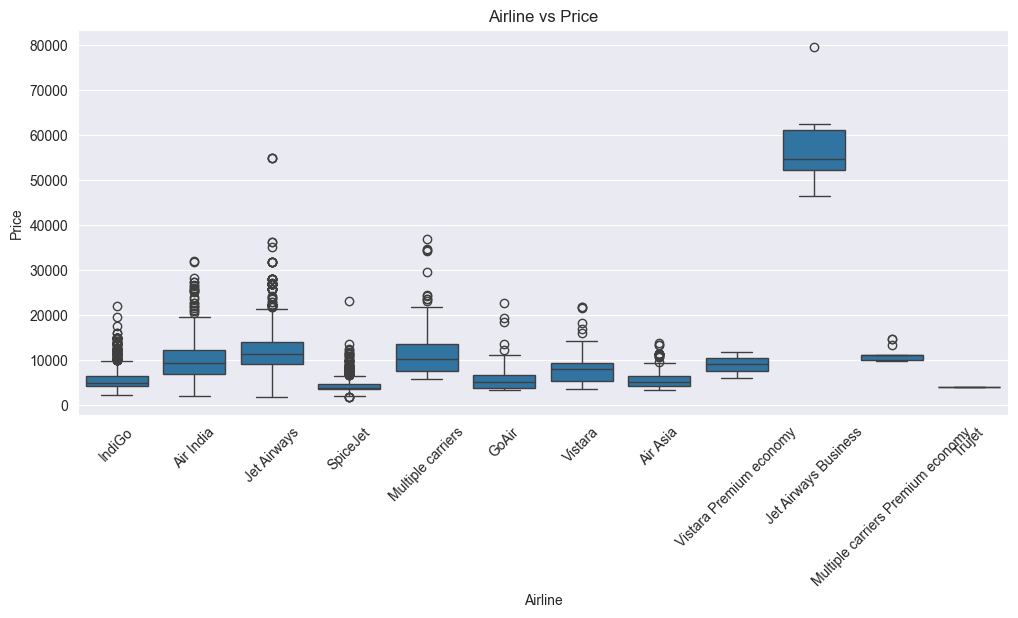

In [19]:
# Airline price distribution using preserved data
plt.figure(figsize=(12, 5))
sns.boxplot(x='Airline', y='Price', data=airline_price_data)
plt.title('Airline vs Price')
plt.xticks(rotation=45)
plt.show()

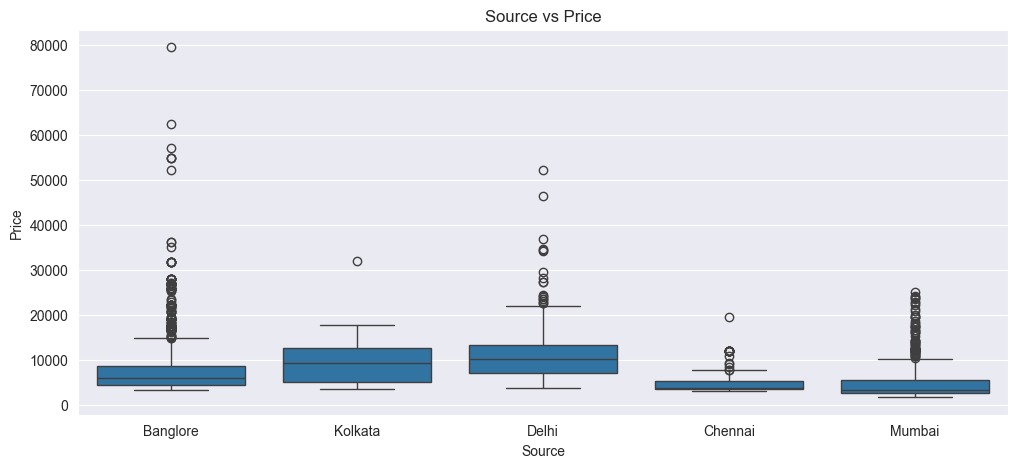

In [20]:
# Source vs Price using preserved data
plt.figure(figsize=(12, 5))
sns.boxplot(x='Source', y='Price', data=source_price_data)
plt.title('Source vs Price')
plt.show()

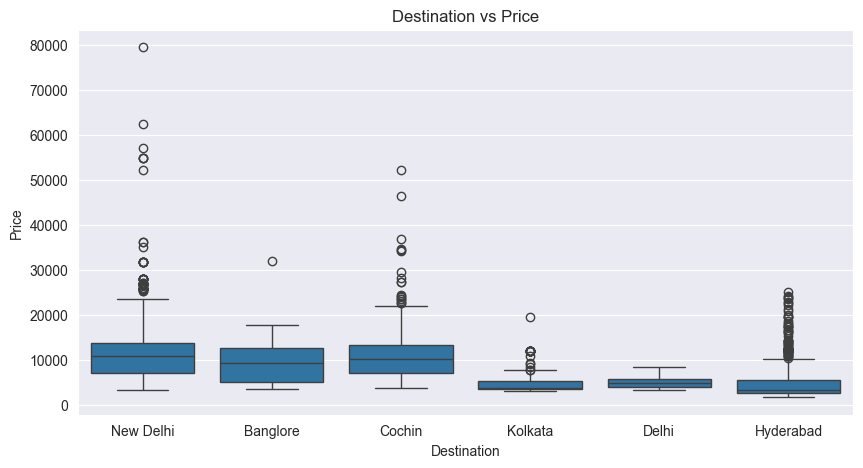

In [21]:
# Destination vs Price using preserved data
plt.figure(figsize=(10, 5))
sns.boxplot(x='Destination', y='Price', data=destination_price_data)
plt.title('Destination vs Price')
plt.show()

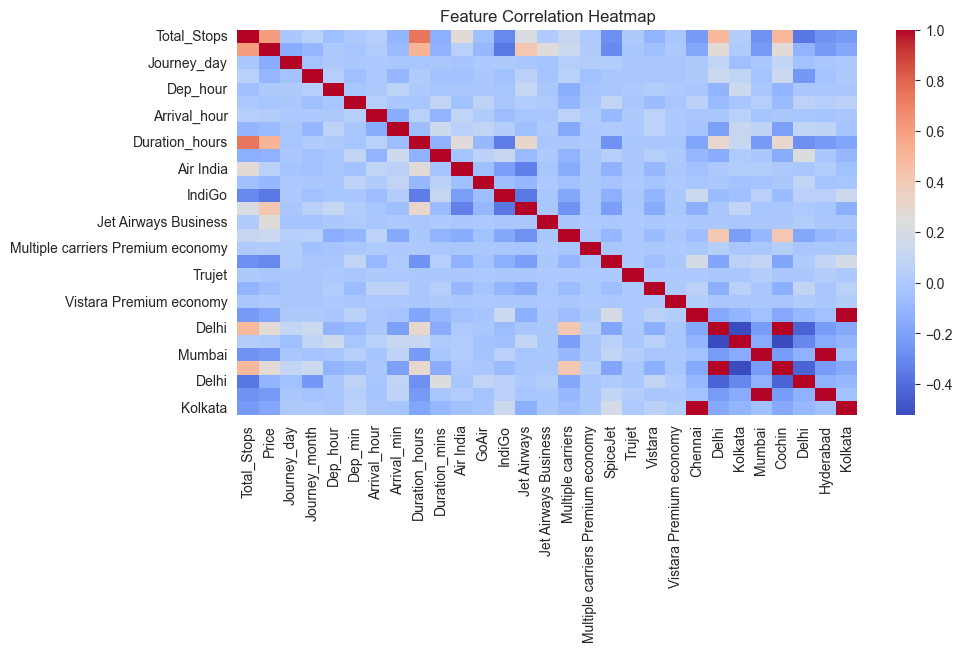

In [22]:
# Heatmap for correlations
plt.figure(figsize=(10,5))
sns.heatmap(final_data.corr(), annot= False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [23]:
# Feature importance using ExtraTreesRegressor
print("\nEvaluating feature importance...")
extra_tree = ExtraTreesRegressor()
extra_tree.fit(X, y)
feature_importances = pd.Series(extra_tree.feature_importances_, index=X.columns)
print("\nTop 20 Feature Importances:")
print(feature_importances.nlargest(20))


Evaluating feature importance...

Top 20 Feature Importances:
Total_Stops             0.204955
Jet Airways             0.147509
Journey_day             0.143964
Duration_hours          0.143207
Jet Airways Business    0.067663
Journey_month           0.058069
Arrival_hour            0.026801
Dep_hour                0.025073
Dep_min                 0.021179
Arrival_min             0.020030
Delhi                   0.019834
IndiGo                  0.018700
Multiple carriers       0.018694
Duration_mins           0.017344
Cochin                  0.012563
Hyderabad               0.009817
Mumbai                  0.008837
Delhi                   0.008569
Air India               0.008568
SpiceJet                0.005187
dtype: float64


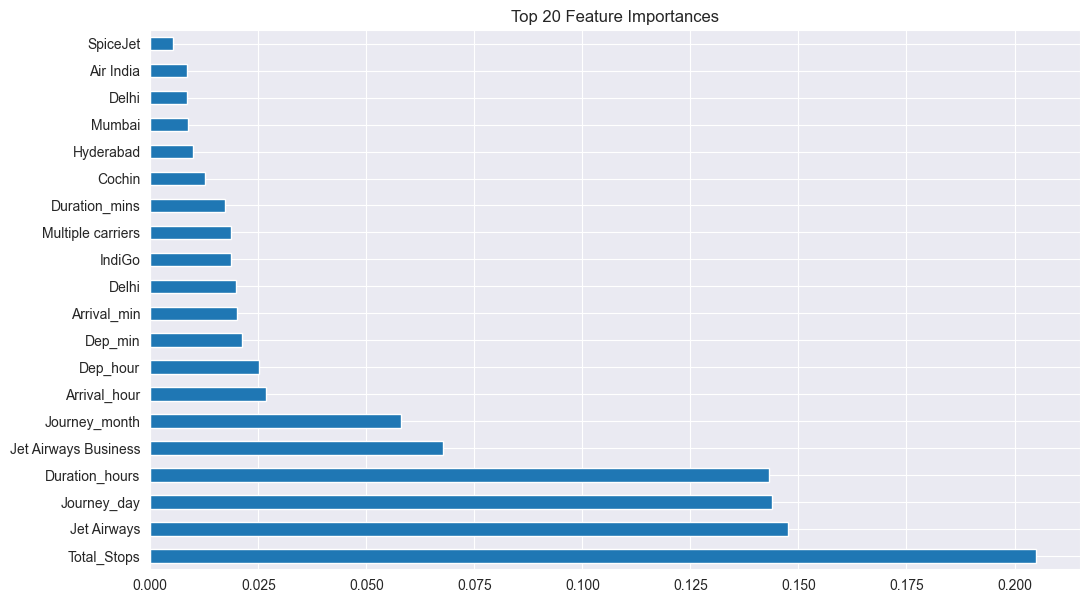

In [24]:
# Plot feature importance
plt.figure(figsize=(12, 7))
feature_importances.nlargest(20).plot(kind='barh')
plt.title('Top 20 Feature Importances')
plt.show()

In [25]:
# Splitting dataset into training and testing sets
print("\nSplitting dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Splitting dataset into training and testing sets...
Training data shape: (7156, 28), Test data shape: (3526, 28)


In [32]:
# Hyperparameter tuning for Random Forest using RandomizedSearchCV
print("\nPerforming hyperparameter tuning for Random Forest...")
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=random_grid, 
    scoring='neg_mean_squared_error', 
    n_iter=10, 
    cv=5, 
    verbose=1, 
    random_state=42, 
    n_jobs=1
)


Performing hyperparameter tuning for Random Forest...


In [33]:
# Train the model
print("\nTraining the Random Forest model with hyperparameter tuning...")
rf_random.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_random.best_params_)


Training the Random Forest model with hyperparameter tuning...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [34]:
# Model evaluation
print("\nEvaluating the model...")
predictions = rf_random.predict(X_test)
r2 = metrics.r2_score(y_test, predictions)
print(f"R2 Score: {r2}")


Evaluating the model...
R2 Score: 0.8163744302094817


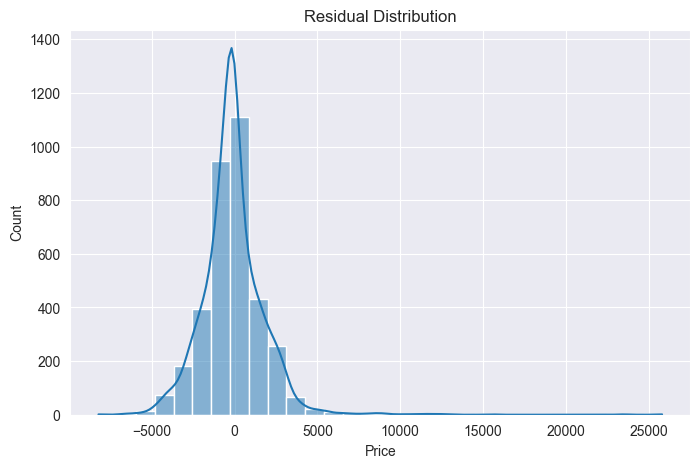

In [35]:
# Residual plot
plt.figure(figsize=(8, 5))
sns.histplot(y_test - predictions, kde=True, bins=30)
plt.title('Residual Distribution')
plt.show()

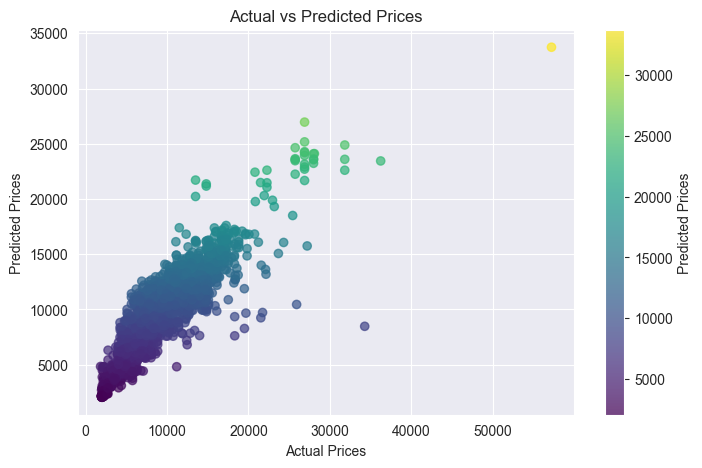

In [36]:
# Actual vs Predicted with Color Variation
plt.figure(figsize=(8, 5))
plt.scatter(y_test, predictions, c=predictions, cmap='viridis', alpha=0.7)
plt.colorbar(label='Predicted Prices')  
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [37]:
# Save the model
print("\nSaving the model...")
with open('Trained_Model.pkl', 'wb') as file:
    pickle.dump(rf_random, file)
print("Model saved successfully as 'Trained_Model.pkl'.")


Saving the model...
Model saved successfully as 'Trained_Model.pkl'.


In [38]:
# Load the trained model
model = pickle.load(open('Trained_Model.pkl', 'rb'))

# Sample input data for the test case
dep_time = '2024-11-20T10:00'  # Departure time
arrival_time = '2024-11-20T13:00'  # Arrival time
Total_stops = 1
airline = 'IndiGo'
Source = 'Delhi'
Destination = 'Banglore'

# Convert Dep_Time and Arrival_Time to relevant time features
Journey_day = pd.to_datetime(dep_time, format="%Y-%m-%dT%H:%M").day
Journey_month = pd.to_datetime(dep_time, format="%Y-%m-%dT%H:%M").month
Departure_hour = pd.to_datetime(dep_time, format="%Y-%m-%dT%H:%M").hour
Departure_min = pd.to_datetime(dep_time, format="%Y-%m-%dT%H:%M").minute

Arrival_hour = pd.to_datetime(arrival_time, format="%Y-%m-%dT%H:%M").hour
Arrival_min = pd.to_datetime(arrival_time, format="%Y-%m-%dT%H:%M").minute

# Calculate duration
dur_hour = abs(Arrival_hour - Departure_hour)
dur_min = abs(Arrival_min - Departure_min)

# Create dictionaries for airline, source, and destination
airline_dict = {
    'Jet Airways': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'IndiGo': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Air India': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    'Multiple carriers': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    'SpiceJet': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    'Vistara': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    'GoAir': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    'Multiple carriers Premium economy': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    'Jet Airways Business': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    'Vistara Premium economy': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    'Trujet': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
}

source_dict = {
    'Delhi': [1, 0, 0, 0],
    'Kolkata': [0, 1, 0, 0],
    'Mumbai': [0, 0, 1, 0],
    'Chennai': [0, 0, 0, 1]
}

destination_dict = {
    'Cochin': [1, 0, 0, 0],
    'Delhi': [0, 1, 0, 0],
    'Hyderabad': [0, 0, 1, 0],
    'Kolkata': [0, 0, 0, 1],
    'Banglore': [0, 0, 0, 0]  # Assuming Bangalore isn't mapped
}

# Get the airline, source, and destination values from the input
airline_data = airline_dict.get(airline, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
source_data = source_dict.get(Source, [0, 0, 0, 0])
destination_data = destination_dict.get(Destination, [0, 0, 0, 0])

# Prepare the feature vector for prediction (X_test)
X_test = [
    Total_stops, Journey_day, Journey_month, Departure_hour, Departure_min,
    Arrival_hour, Arrival_min, dur_hour, dur_min,
    *airline_data, *source_data, *destination_data
]

# Test the model prediction
output = model.predict([X_test])

# Print the predicted price 
print(f"Predicted Price: ₹{round(output[0], 2)}")

Predicted Price: ₹7009.38
